In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d

# Q2 - Adding features

## (a) 

## Setting up and visualizing data

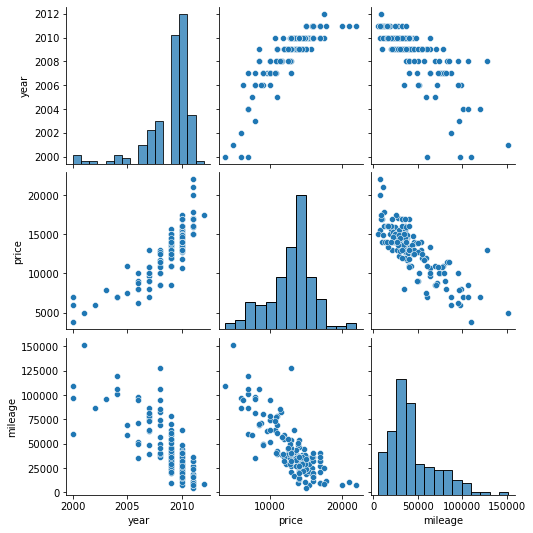

In [40]:
carData = pd.read_csv("fordFocus.csv")
sns.pairplot(data=carData)
plt.show()

This graph shows there are clear linear relationships between price, model year (positive) and mileage (negative)

## Creating linear regression model

### Adding features and splitting data

In [58]:
features = ['year','mileage']
XTrain, XTest, YTrain, YTest = train_test_split(
    carData[features].values,
    carData.price,
    test_size=0.2, # 80% Training data 20% Test data
)

### Training the model and creating a prediction

In [59]:
model = LinearRegression()
model.fit(XTrain,YTrain)
prediction = model.predict(XTest)

### Plotting data 

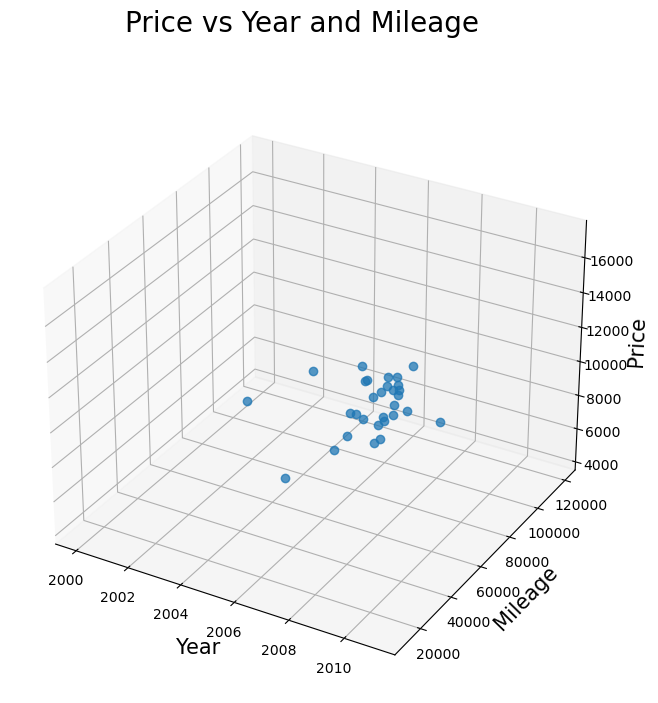

In [98]:
# Create graph
figure = plt.figure(figsize=(8,8),dpi=100)
figure.suptitle("Price vs Year and Mileage",fontsize=20)

# Plot data and add graph attributes
axes = figure.add_subplot(projection="3d")
# XTest[:,0] = year column      XTest[:,1] = mileage column 
axes.plot(XTest[:,0],XTest[:,1],YTest,marker="o",zorder=15,linestyle='none',alpha=0.75)
axes.set_xlabel('Year',fontsize=15)
axes.set_ylabel('Mileage',fontsize=15)
axes.set_zlabel('Price',fontsize=15)

plt.show()

### Computing R<sup>2</sup> and MSE 

In [61]:
rr  = model.score(XTest,YTest)
mse = mean_squared_error(prediction,YTest)
print('MSE: ', mse)
print('R squared: ', rr)

MSE:  2106024.810855518
R squared:  0.8016204659170488


### Comparison with previous model

Compared to the previous model that only included mileage, this model is preforming better judging from the increased R<sup>2</sup> score (was approximately 0.52 in the previous model) of 0.8, meaning this model explains about 80% of the dependant variable with our features.

## (b)

## Creating Polynomial Regression model

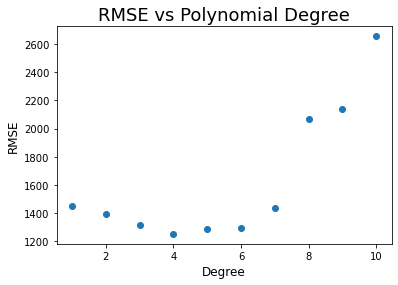

In [118]:
# Fill arrays
maxDeg  = 10
RSquare = np.zeros(maxDeg+1)
RMSE    = np.zeros(maxDeg+1)

for deg in range(1,maxDeg+1):
#   Create features, train model and get R^2 + RMSE
    polynomial = PolynomialFeatures(degree=deg)
    XTrans     = polynomial.fit_transform(XTrain)
    polyModel  = LinearRegression()
    polyModel.fit(XTrans,YTrain)  
    XTrans2      = polynomial.fit_transform(XTest)
    RSquare[deg] = polyModel.score(XTrans2,YTest)
    RMSE[deg]    = np.sqrt(mean_squared_error(polyModel.predict(XTrans2),YTest))

plt.scatter(range(1,maxDeg+1), RMSE[1:])
plt.title('RMSE vs Polynomial Degree', fontsize=18)
plt.xlabel('Degree',fontsize=12)
plt.ylabel('RMSE',fontsize=12)
plt.show()

This polynomial model is underfitting for degrees less than 4 and overfitting for degrees greater than 4